In [1]:
from music21 import *

In [19]:
s = corpus.parse('bach/bwv282.xml')
print(s.analyze('key'))
print(corpus.corpora.CoreCorpus().getPaths()[0])

G major
/Users/glangmead/miniforge3/envs/py3/lib/python3.11/site-packages/music21/corpus/airdsAirs/book1.abc


In [10]:
# Next we analyse these 319 entries and extract key from each
from music21 import*
import matplotlib.pyplot as plt # Load some extra plotting libraries

chorales = corpus.search(composer='J.S. Bach',numberOfParts=4)

dict = {}
dict2 = {}
counter=1; maxlen = len(chorales)
for chorale in chorales:
   print('Analysing', counter,'/',maxlen, chorale.metadata.title,'...')
   score = corpus.parse(chorale)
   key = score.analyze('key').tonicPitchNameWithCase
   key2 = score.analyze('key').mode
   dict[key] = dict[key] + 1 if key in dict.keys() else 1
   dict2[key2] = dict2[key2] + 1 if key2 in dict2.keys() else 1
   counter +=1

Analysing 1 / 320 None ...
Analysing 2 / 320 None ...
Analysing 3 / 320 None ...
Analysing 4 / 320 None ...
Analysing 5 / 320 None ...
Analysing 6 / 320 None ...
Analysing 7 / 320 None ...
Analysing 8 / 320 None ...
Analysing 9 / 320 None ...
Analysing 10 / 320 None ...
Analysing 11 / 320 None ...
Analysing 12 / 320 None ...
Analysing 13 / 320 None ...
Analysing 14 / 320 None ...
Analysing 15 / 320 None ...
Analysing 16 / 320 None ...
Analysing 17 / 320 None ...
Analysing 18 / 320 None ...
Analysing 19 / 320 None ...
Analysing 20 / 320 None ...
Analysing 21 / 320 None ...
Analysing 22 / 320 None ...
Analysing 23 / 320 None ...
Analysing 24 / 320 None ...
Analysing 25 / 320 None ...
Analysing 26 / 320 None ...
Analysing 27 / 320 None ...
Analysing 28 / 320 None ...
Analysing 29 / 320 None ...
Analysing 30 / 320 None ...
Analysing 31 / 320 None ...
Analysing 32 / 320 None ...
Analysing 33 / 320 None ...
Analysing 34 / 320 None ...
Analysing 35 / 320 None ...
Analysing 36 / 320 None ...
A

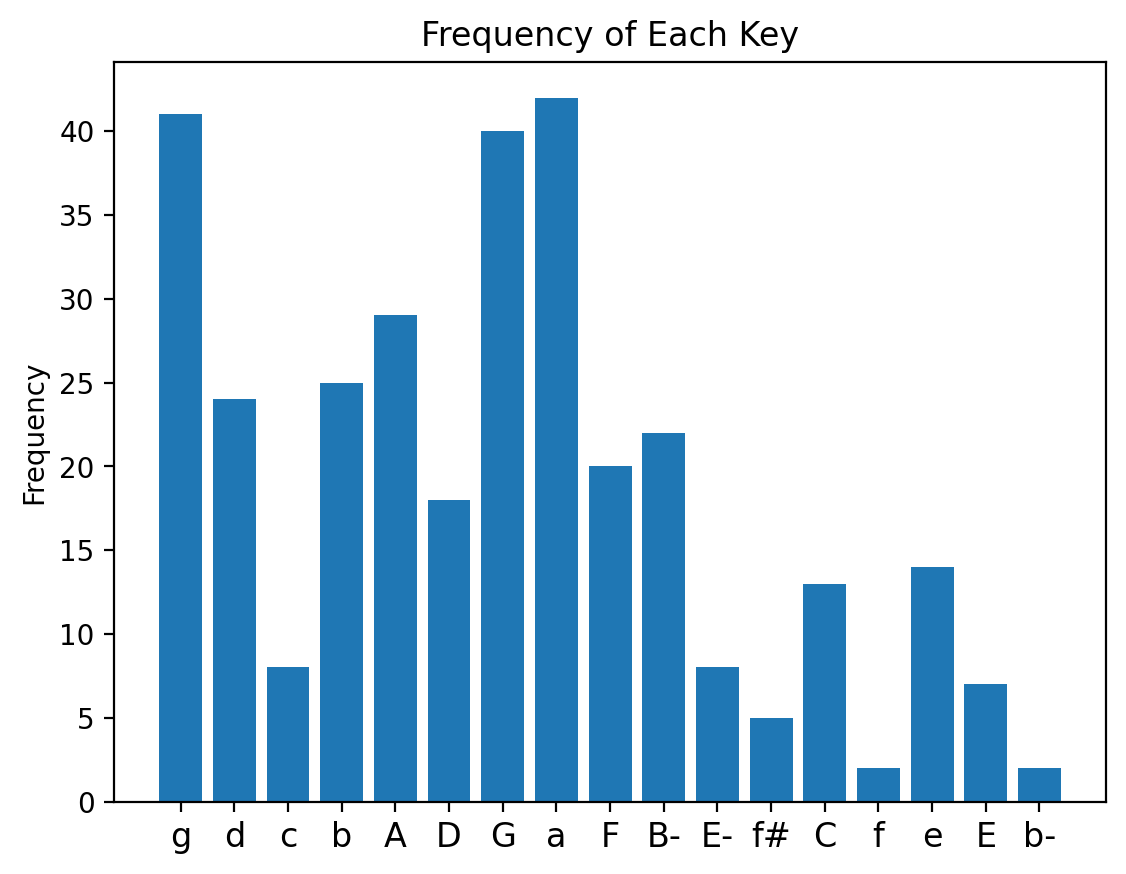

{'minor': 163, 'major': 157}


In [11]:
# Plot the results
ind = [i for i in range(len(dict))]
fig, ax = plt.subplots()
ax.bar(ind, dict.values())
ax.set_title('Frequency of Each Key')
ax.set_ylabel('Frequency')
plt.xticks(ind, dict.keys(), rotation='horizontal',size=12)
plt.show()
print(dict2) # print the frequency of major and minor keys

In [12]:
chorales = corpus.search(composer='J.S. Bach',numberOfParts=4)
print(chorales)

c=[]
title=[]
counter=0; maxlen = len(chorales)
for chorale in chorales:
   print('Analysing', counter,'/',maxlen, chorale.metadata.title,'...')
   score = corpus.parse(chorale)
   tc = score.analyze('key')
   c.append(tc.correlationCoefficient) # get the correlation to the highest key
   title.append(score.metadata.title)
   counter +=1

<music21.metadata.bundles.MetadataBundle {320 entries}>
Analysing 0 / 320 None ...
Analysing 1 / 320 None ...
Analysing 2 / 320 None ...
Analysing 3 / 320 None ...
Analysing 4 / 320 None ...
Analysing 5 / 320 None ...
Analysing 6 / 320 None ...
Analysing 7 / 320 None ...
Analysing 8 / 320 None ...
Analysing 9 / 320 None ...
Analysing 10 / 320 None ...
Analysing 11 / 320 None ...
Analysing 12 / 320 None ...
Analysing 13 / 320 None ...
Analysing 14 / 320 None ...
Analysing 15 / 320 None ...
Analysing 16 / 320 None ...
Analysing 17 / 320 None ...
Analysing 18 / 320 None ...
Analysing 19 / 320 None ...
Analysing 20 / 320 None ...
Analysing 21 / 320 None ...
Analysing 22 / 320 None ...
Analysing 23 / 320 None ...
Analysing 24 / 320 None ...
Analysing 25 / 320 None ...
Analysing 26 / 320 None ...
Analysing 27 / 320 None ...
Analysing 28 / 320 None ...
Analysing 29 / 320 None ...
Analysing 30 / 320 None ...
Analysing 31 / 320 None ...
Analysing 32 / 320 None ...
Analysing 33 / 320 None ...
An

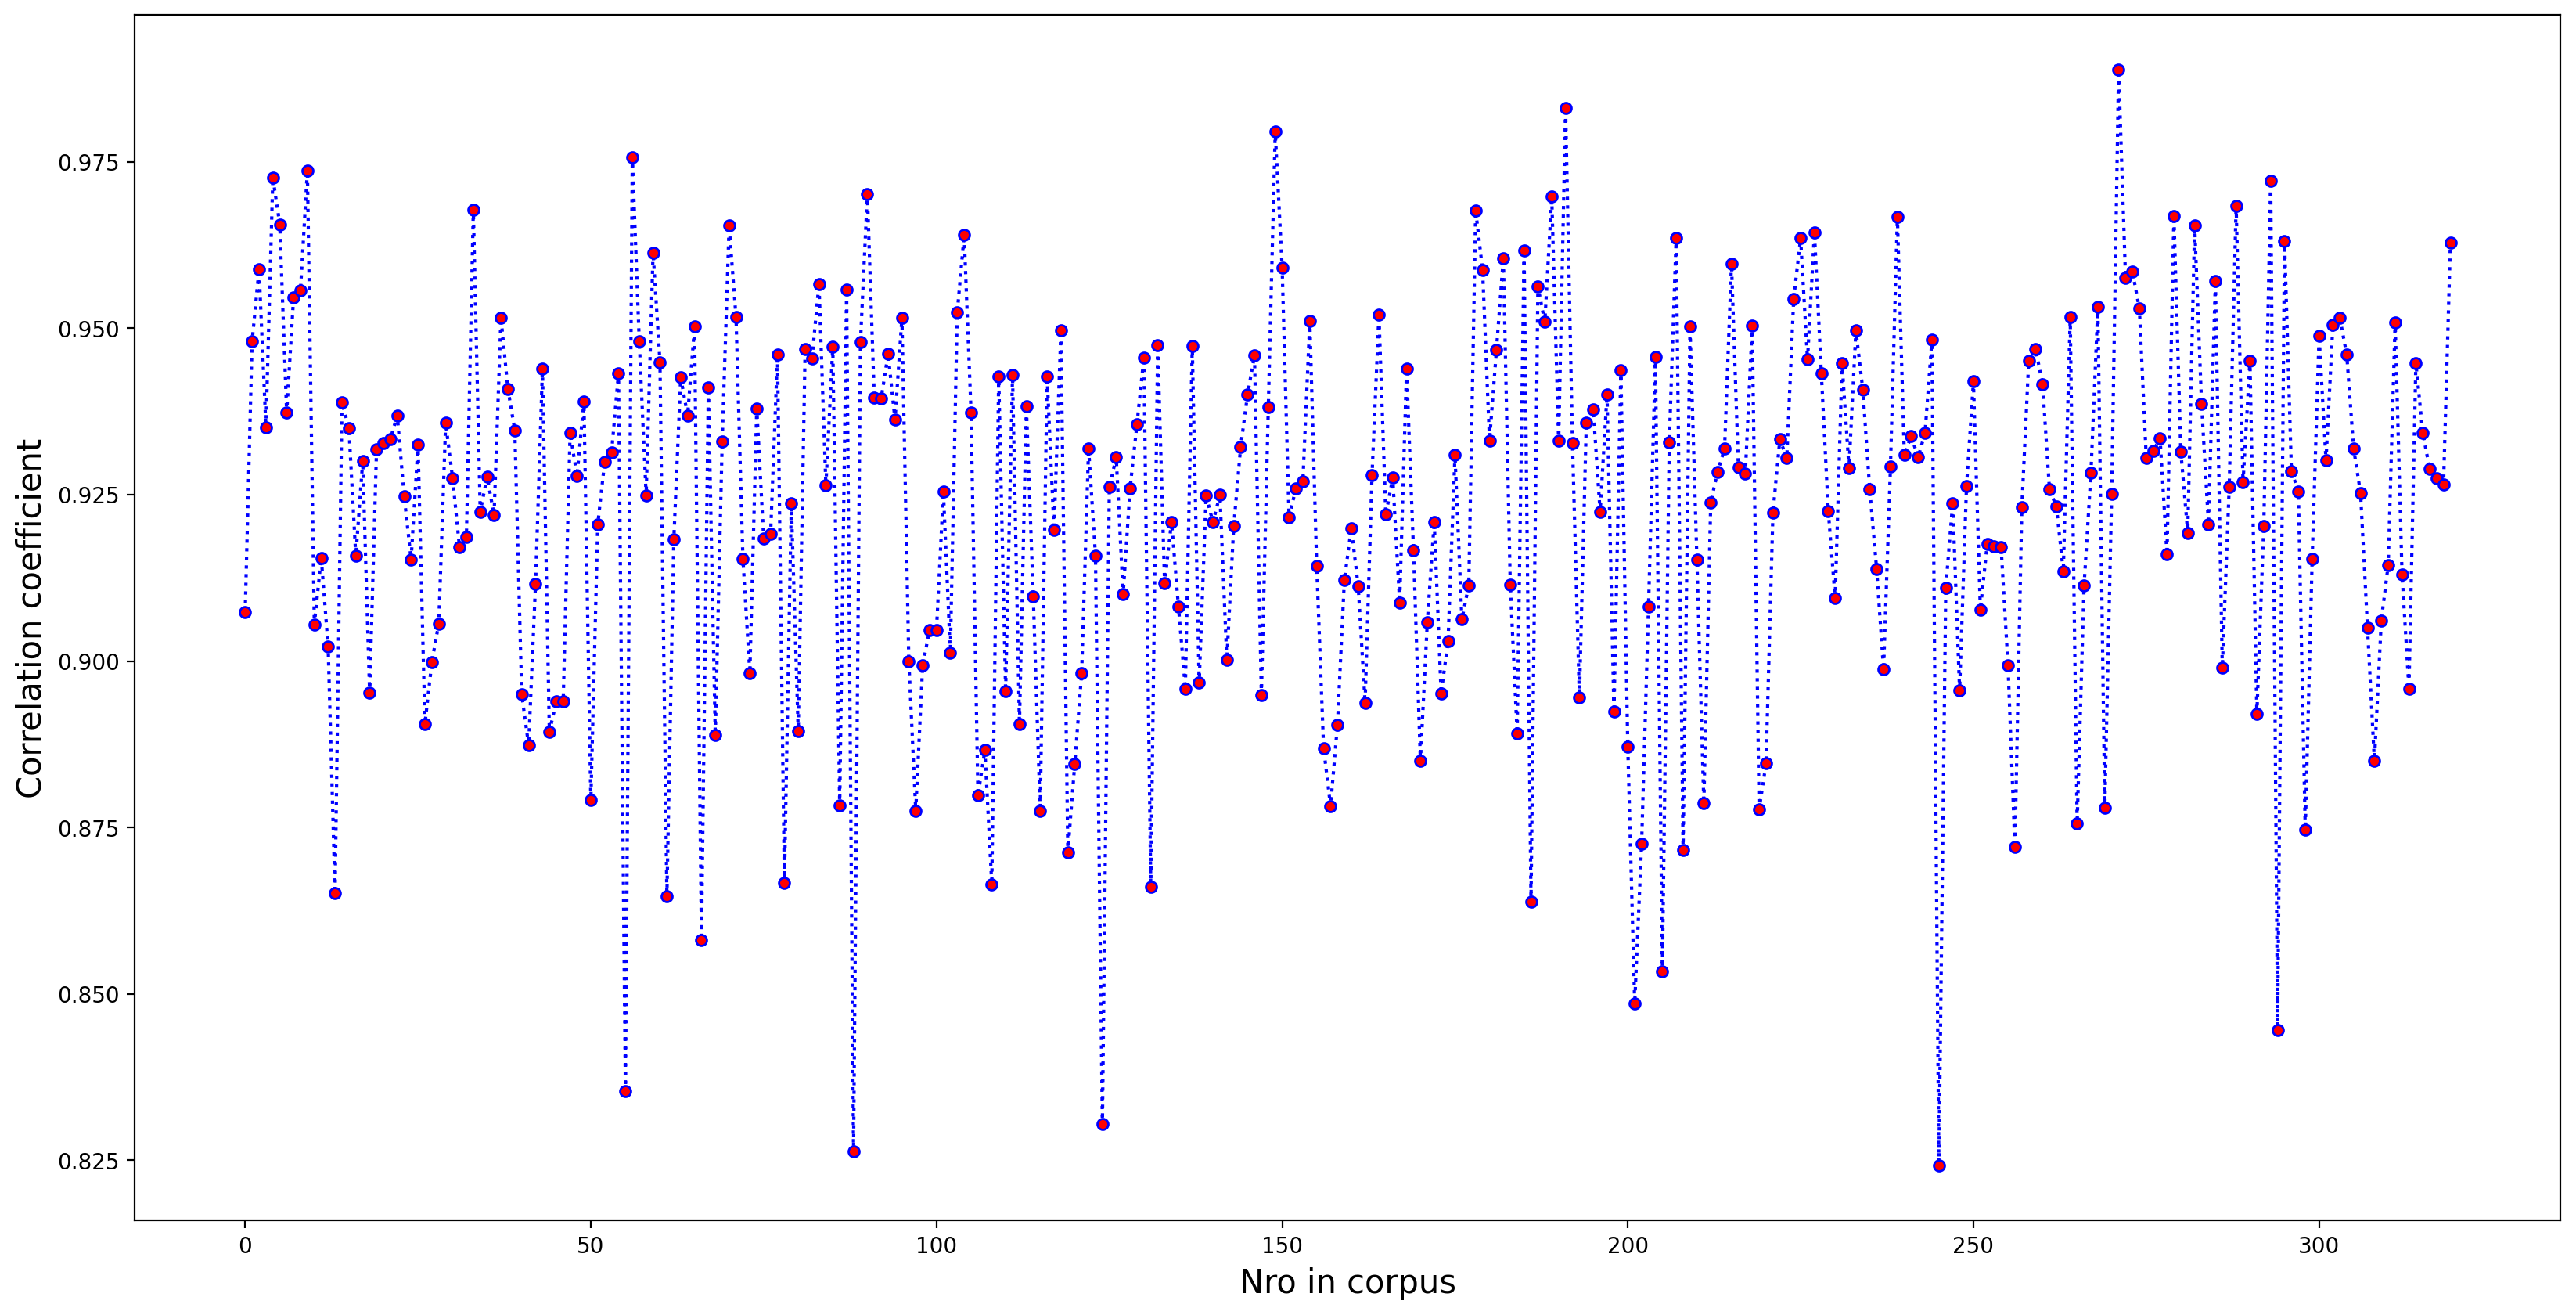

In [13]:
# Let's see what the correlations look like

fig, ax = plt.subplots()
ax.plot(c, 'bo:',markersize=5,markerfacecolor='r')
fig.set_size_inches(20, 10)
ax.set_ylabel('Correlation coefficient',size=15)
ax.set_xlabel('Nro in corpus',size=15)
plt.show()

Ambiguous keys can be found in: [55, 88, 124, 201, 245, 294]
None : 0.8486105841122339


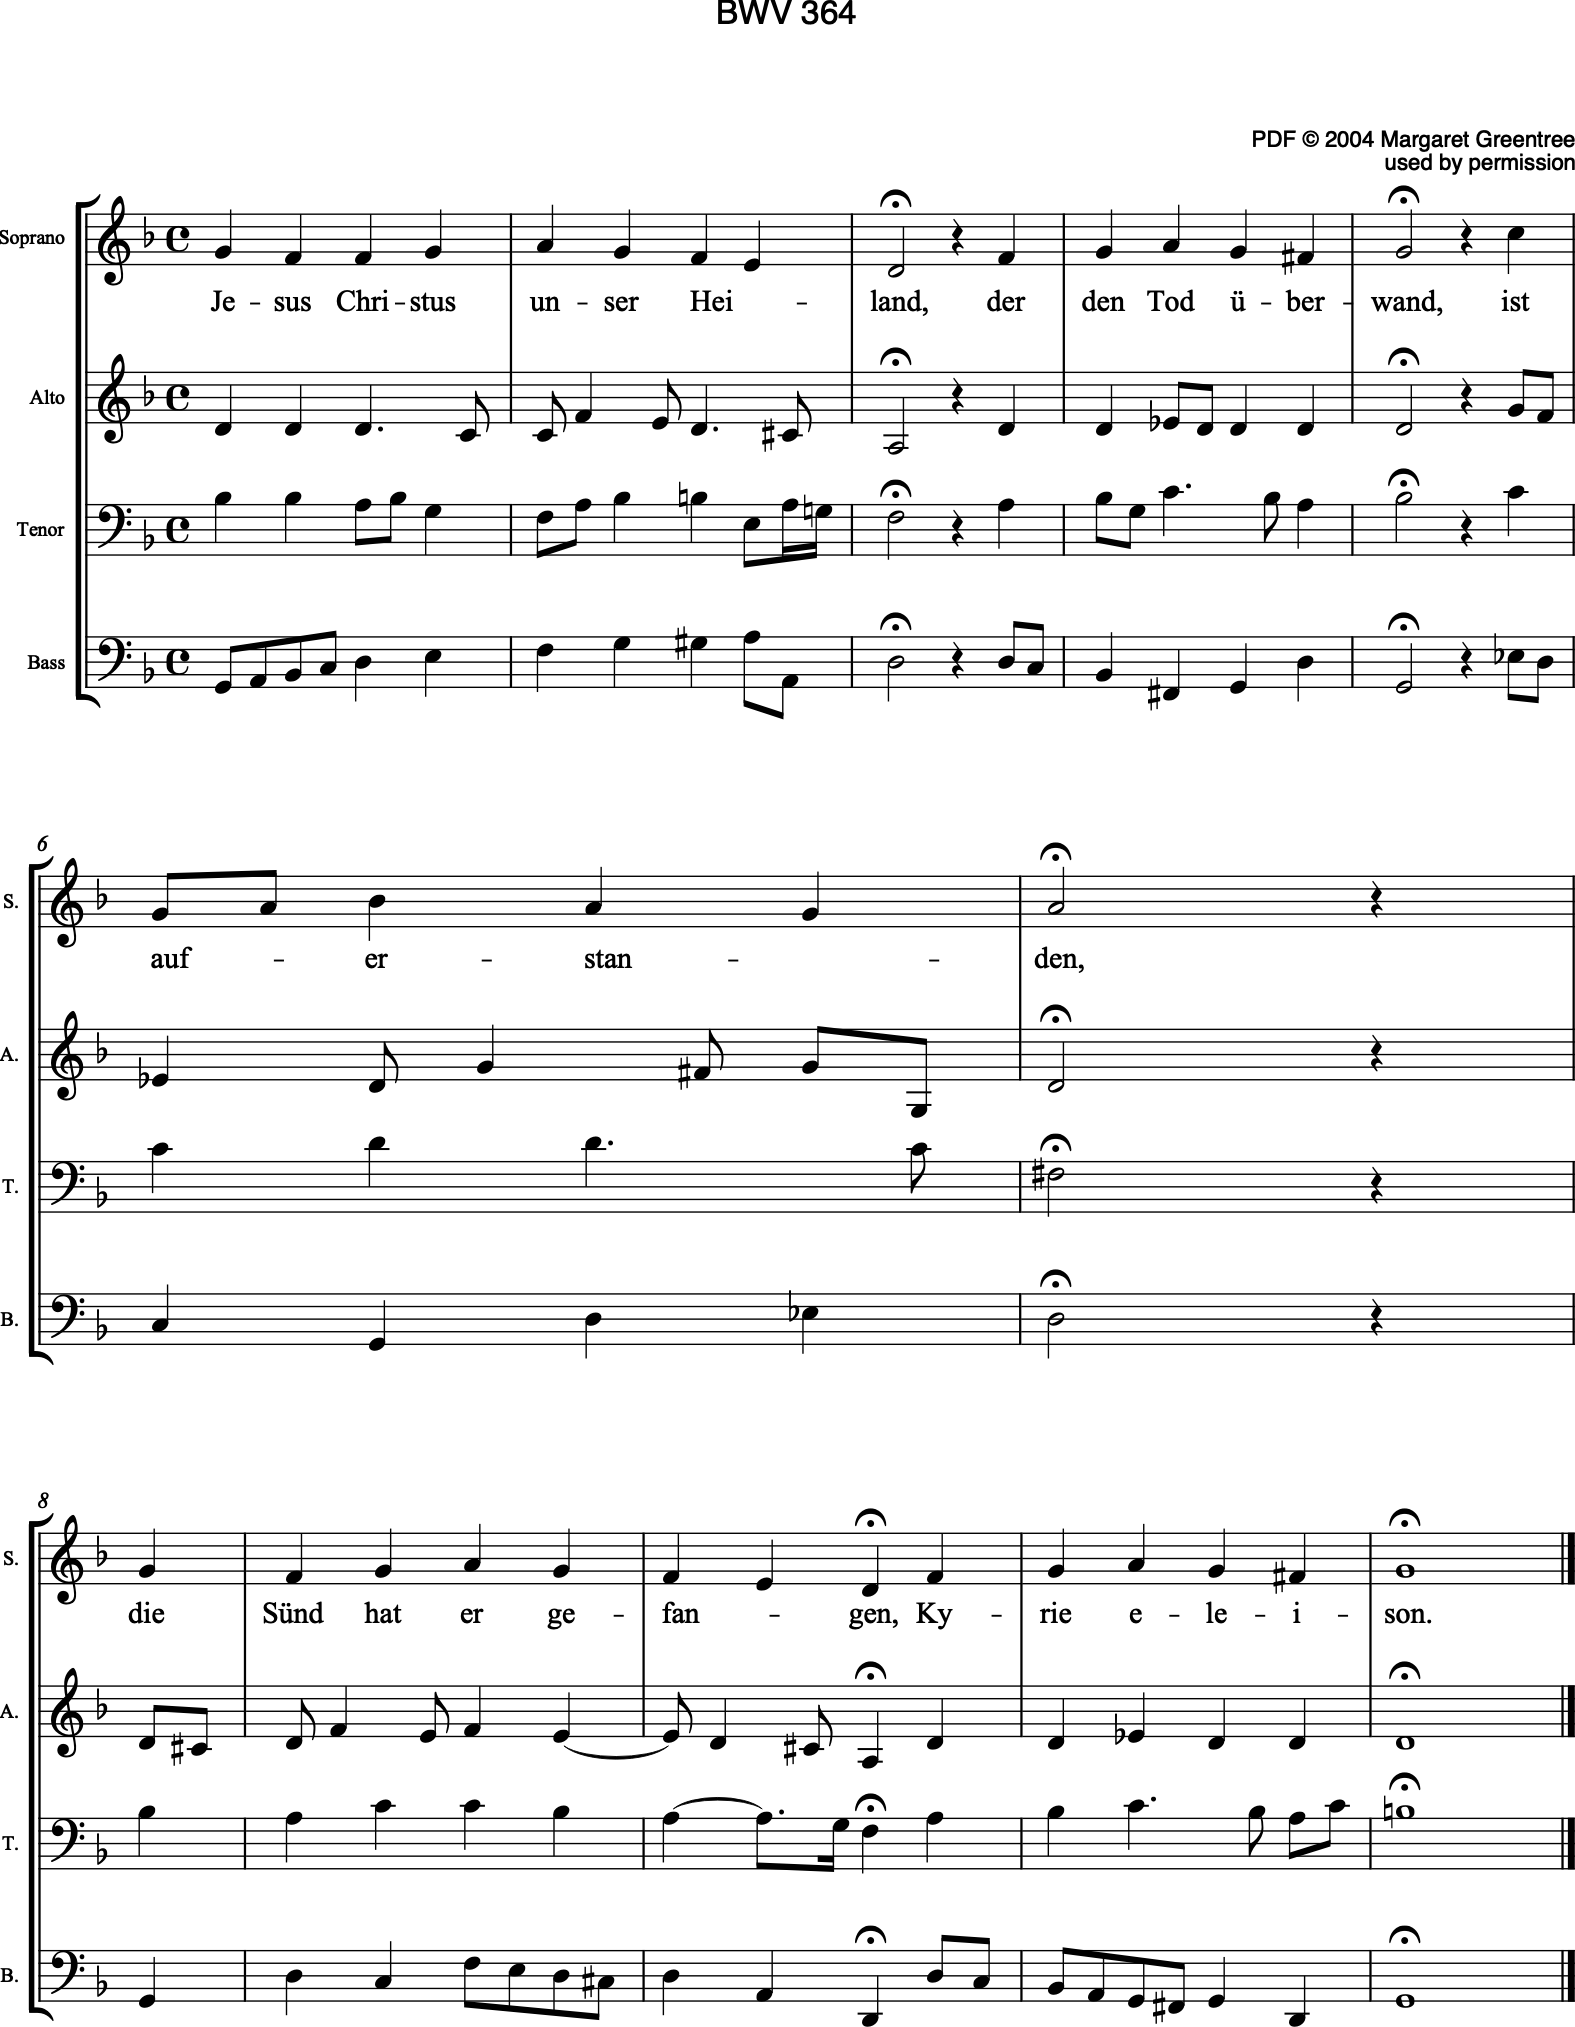

In [14]:
ambiguous = [ n for n,i in enumerate(c) if i < 0.85 ] # get indices of tonally ambiguous chorales.
print('Ambiguous keys can be found in:',ambiguous)

# let's look at one of these
score = corpus.parse(chorales[ambiguous[3]])
tc = score.analyze('key')
print(score.metadata.title,':',tc.correlationCoefficient)
score.show()
